# <div style="text-align: center; color: black;"> 机器学习小组大作业 </div>

* 合肥工业大学宣城校区 计算机科学与技术22-4班 第1小组<br><br>
* 说明：我们选取了kaggle平台上有关蘑菇是否可以食用的数据集，该数据集共有五万多条数据。以下是我们会经历的主要步骤<br>
  一、数据集处理<br>
  1、观察数据集<br>
  .<br>
  .<br>
  .<br>
  后面再补充<br>
对该数据集进行分类并可视化。<br>
数据集网址：https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data

# 设置

首先，导入一些常用模块并测试一下这个notebook在配置的conda环境中是否可以正常工作。

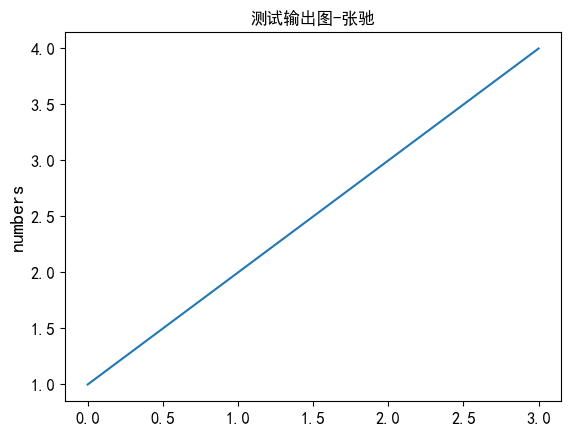

测试代码运行正常！


In [2]:
# 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
import tensorflow
import torch
import warnings

# 设置matplotlib字体，让matplotlib可以显示中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 设置随机种子以保证结果的一致性
np.random.seed(42)

# 设置matplotlib参数
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

# 忽略无用的警告
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 画图测试
plt.plot([1, 2, 3, 4])
plt.ylabel('numbers')
plt.title("测试输出图-张驰")
plt.show()

print("测试代码运行正常！")

## 第一部分：数据集处理

以下内容先对 https://www.kaggle.com/code/ajeetsingh123/mushroom-classification-acc-99-multiple-algos 进行复现，后续改动不影响后面的代码。

### 1、读取数据集

通过pandas读入数据集

In [3]:
data = pd.read_csv(r'./mushroom_cleaned.csv')
df = pd.DataFrame(data)
df.head()
print("数据集正常读入")

数据集正常读入


### 2、对数据集进行分析

<font size="4">（1）通过info（）方法获取数据集的简单描述。如总行数，每个属性的类型和非空值的数量。</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


通过df.info()输出可知，该数据共有54035行、9列数据。同时，每一列的非空数据量都为54035，等于总行数，表明这个数据集没有空缺数据。

<font size="4">（2）通过describe()方法查看数据集的属性摘要</font>

In [5]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


<font size="4">（3）根据kaggle上的数据集介绍信息，统计并对比可食用蘑菇和不可食用蘑菇数据量</font>

通过网站中数据集作者对数据集的介绍可知，“class”表示蘑菇是否可食用。<br>
![图1 kaggle网站上作者对数据集的介绍](images/img1.png)<br>

下面对可食用和不可食用的蘑菇数据量进行统计分析，看看二者数据量是否相差过大，如果相差过大则需要对过多一方的数据进行适当删除，避免因数据不平衡导致模型预测时有偏向。

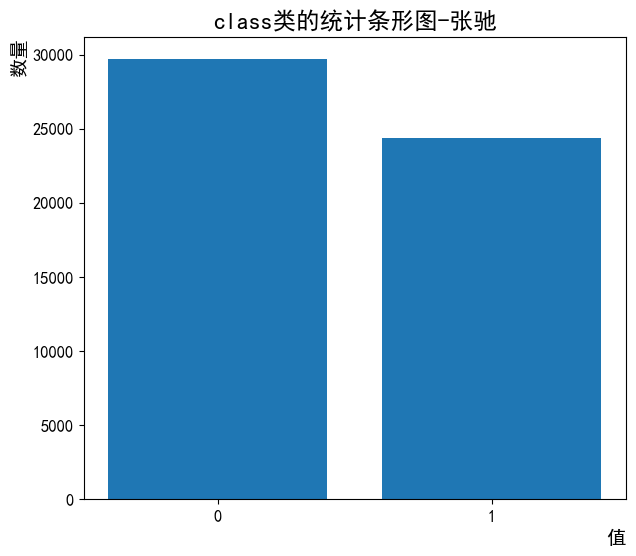

In [6]:
fig, ax = plt.subplots(figsize=(7, 6))

x = [0,1]
y_T = df['class'].value_counts()
y = [y_T[1],y_T[0]]
ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(x)

ax.set_xlabel("值", loc='right', color='black', fontsize=14)
ax.set_ylabel("数量", loc='top', color='black', fontsize=14)
ax.set_title("class类的统计条形图-张驰", fontsize=17)

plt.show()

通过条形计数图可以看出，可食用蘑菇和不可食用蘑菇数据量相差不大，数据集较为平衡，不需要对数据集进行删减处理。

<font size='4'>（4）对数据集中的其他八个特征量进行分析</font>

我们也可以使用seaborn绘制直方图。保持kde=True以绘制密度和直方图

<p style="font-size:16px; font-family:Courier New;">
    ①使用直方图进行分析
</p>

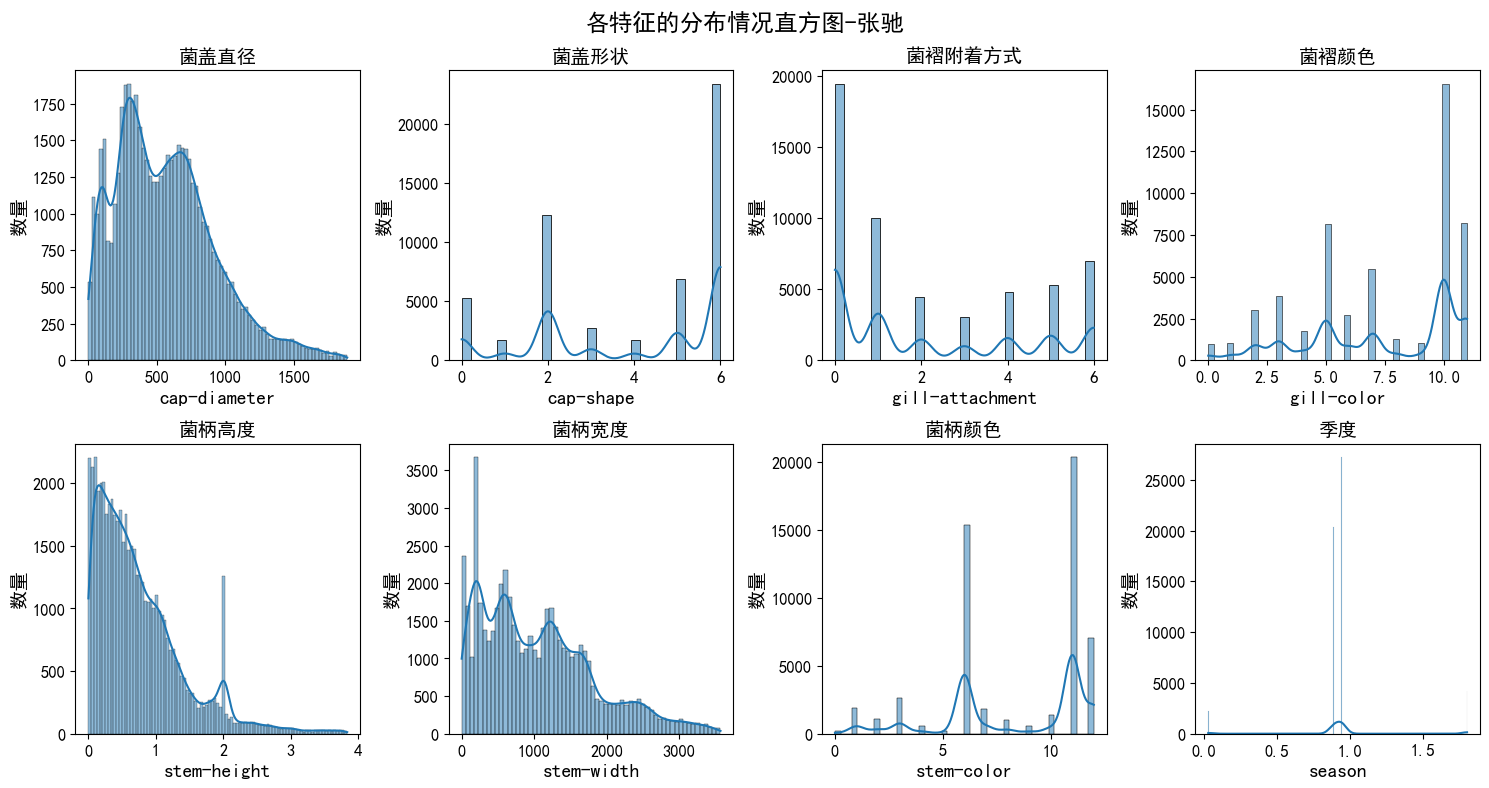

In [7]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
column_name = ['菌盖直径','菌盖形状','菌褶附着方式','菌褶颜色','菌柄高度','菌柄宽度','菌柄颜色','季度']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)  
    axs[i].set_title(column_name[i], fontsize=14, loc='center')  # 设置子图标题
    axs[i].set_ylabel('数量')  # 设置y轴标签
    

plt.suptitle("各特征的分布情况直方图-张驰", fontsize=17)
plt.tight_layout()  
plt.show()

观察直方图，有以下发现：<br>
* 首先，这个数据集包含了蘑菇的各种特征，包括菌盖直径、菌盖形状、菌褶附着方式、菌褶颜色、菌柄高度、菌柄宽度、菌柄颜色和季度等。这些特征中，菌盖直径、菌柄高度、菌柄宽度和季度是连续的数值，通过直方图和我们对现实情况的认识，这些连续数据的x轴数据应该分别为：长度、高度、宽度、生长时间；而菌盖形状、菌褶附着方式、菌褶颜色和菌柄颜色则有明显的离散特征，是离散的数据，他们应该是数据集制作时定义的不同类别的信息。通过前面的分析我们知道，我们的目标是预测蘑菇是否可以食用。对于类别这样的离散数据特征，因为大自然中不同蘑菇品种的差别，出现蘑菇的某一特征的某个类别多余其他类别属于正常现象，所以不作为异常数据进行额外处理。下面对菌盖直径、菌柄高度、菌柄宽度和季度这些连续数据进行分析。<br>
* 对于菌盖直径这个特征，我们尝试将毫米这个单位代入数据，但是这样最大的蘑菇直径超过了1.5米，显然不符合实际。通过在kaggle上原数据集网页中提供的网址可以知道这份数据来自加利福尼亚大学尔湾分校，所以我们尝试代入美国使用的长度单位，最终认为point这个单位比较符合，1point = 0.3528mm，1500point=529.2mm=52.92cm，这个大小差不多是自然界中最大的蘑菇巨型牛肝菌能够达到的大小。而超过1500的数据则过于异常，不太符合实际，通过直方图可以看到这一部分数据非常少，保留这一份数据可能会对模型造成一些负面的影响，因此我们决定删除这一部分数据。<br>
* 对于菌柄高度这个数据，代入单位dm可以比较适应自然界的真实情况，所以我们认为这一部分数据并不存在太大的问题。但是我们也可以通过直方图看到在“2”这个地方蘑菇的数量远远大于周围其他蘑菇的数量，但是根据自然规律这个直方图应该保持下降的趋势，当前的情况可能导致模型在2dm处过拟合，所以我们考虑减少一部分2dm附近的数据。<br>
* 对于菌柄宽度这个数据，我们代入μm这个单位可以比较好的适应自然情况，所以不做额外处理。<br>
* 对于季度这个数据，我们认为他表示蘑菇的生长时长，单位为季度，通过直方图可以看出，绝大多数蘑菇的生长时间在一个季度左右，即30天，这符合自然规律，所以不对其做额外处理。


<p style="font-size:16px; font-family:Courier New;">
    ②绘制相关矩阵进行分析
</p>

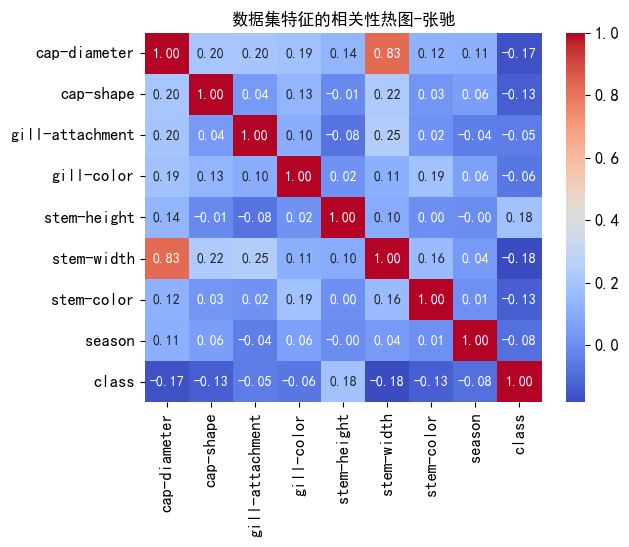

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('数据集特征的相关性热图-张驰')
plt.show()

通过观察相关性矩阵的热力图，我们可以发现，数据集中的特征之间的相关性总体上较低，这意味着每个特征都能为模型提供独立的信息。虽然蘑菇的菌盖直径和菌柄宽度的相关性较高，但考虑到整个数据集的特征数量并不多，且二者正相关符合自然规律，保留这两个特征可以为模型提供更丰富的信息，因此，我们决定保留所有特征进行模型训练。

### 3、基于上面的分析对数据集进行处理

### 4、将数据集划分为训练集、测试集和验证集

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 定义数据和标签
x = df.drop(columns=['class'])
y = df['class']

# 创建标准化对象
std = StandardScaler()

# 首先将数据集划分为训练集和其余部分（测试集和验证集）
x_train, x_other, y_train, y_other = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

# 然后将其余部分划分为测试集和验证集
x_test, x_val, y_test, y_val = train_test_split(x_other, y_other, test_size=0.5, stratify=y_other, random_state=42)

# 对数据进行标准化处理
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
x_val = std.transform(x_val)

## 第二部分：模型训练

### 1、吴在彤

### 2、张驰

### 3、吴硕

### 4、胡浩鸿

### 5、苏昱铭

### 6、祁子涵